In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
#Changing default size of Matplotlib plots to 20 x 10 inches
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
full_data = train_data.append(test_data, ignore_index= True)

titanic = full_data[:891]
del train_data , test_data

print ('Datasets:' , 'full data:' , full_data.shape , 'titanic:' , titanic.shape)
# train_data.head()
# train_data.describe()

Datasets: full data: (1309, 12) titanic: (891, 12)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [3]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
# Desciption of Object type columns by setting include option
titanic.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,204,889,891,891,891
unique,147,3,891,2,681
top,B96 B98,S,"Farrell, Mr. James",male,1601
freq,4,644,1,577,7


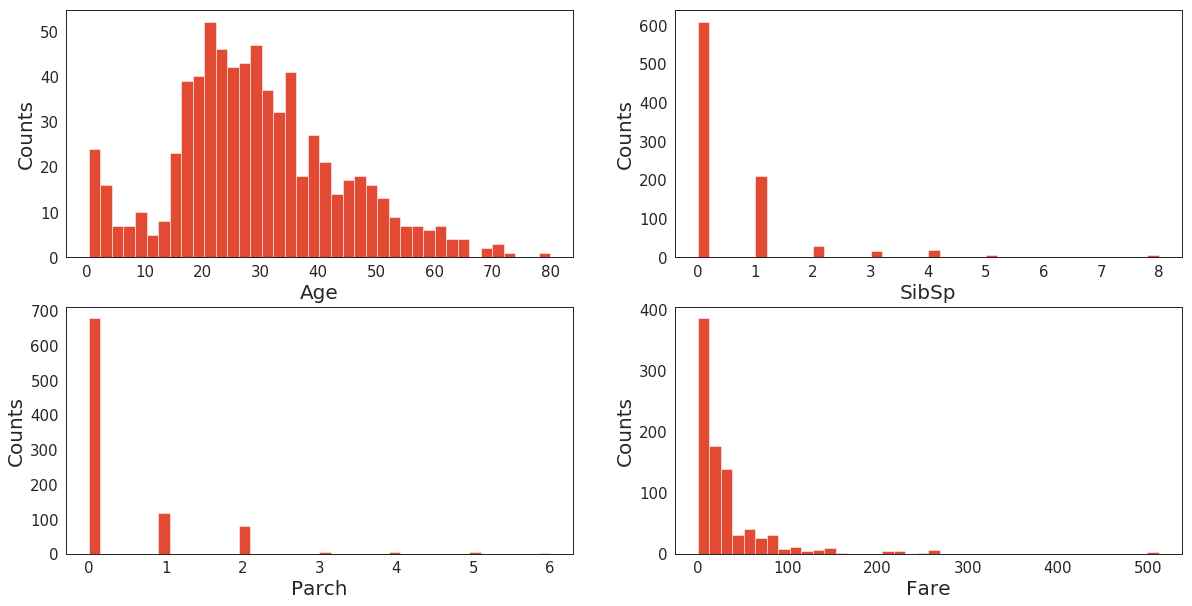

In [5]:
# HISTOGRAMS OF THE NUMERICAL VARIABLES

fig, axes = plt.subplots(nrows =2, ncols=2)
# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

axes = axes.ravel();    # converting axes to a 1-D array w/ numpy.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic[num_features[idx]].dropna(), bins = 40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

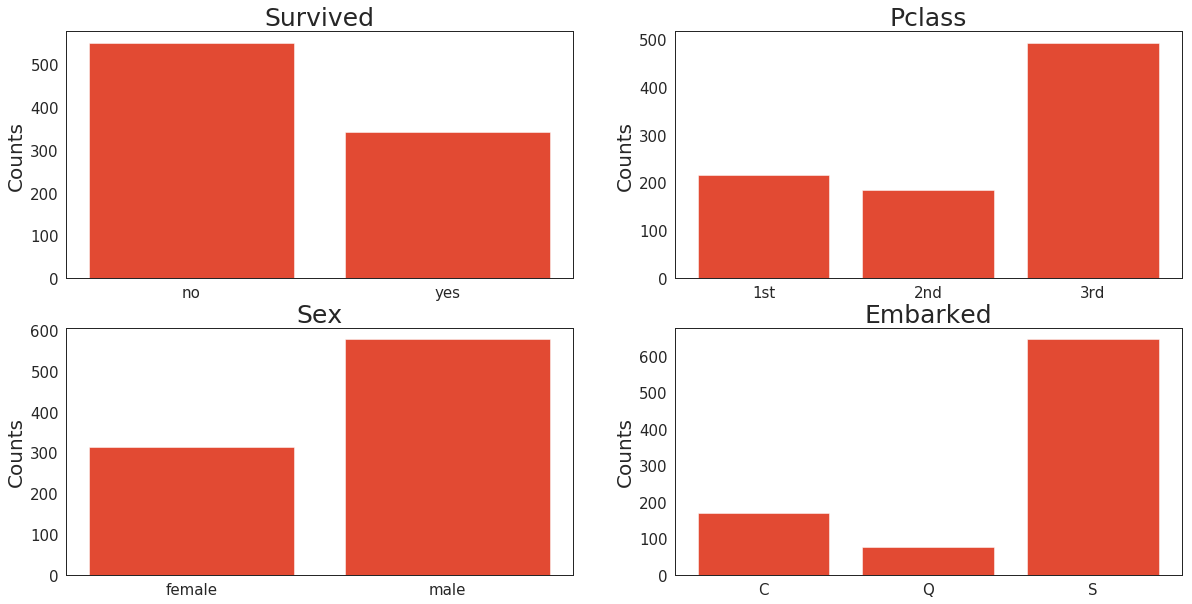

In [6]:
# BARPLOT FOR THE CATEGORICAL DATA

fig, axes = plt.subplots(2, 2)
X_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

'''here size() returns a Pandas series containing no. of passengers in the diff. classes,
reset_index() returns a df & gives the name 'Counts' to the col. containing no. of passengers in the diff. classes
'''
X_Pclass= titanic.replace({'Pclass': {1 : '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name= "Counts")['Pclass']
Y_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

X_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Counts']

axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Counts']

axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

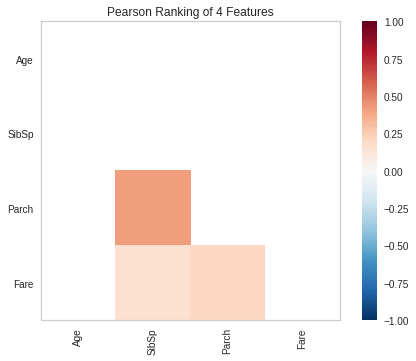

In [7]:
# ARE THE NUMERICAL VARIABLES CORRELATED?

from yellowbrick.features import Rank2D

X = titanic[num_features].to_numpy()
visualizer = Rank2D(features = num_features, algorithm = 'pearson')
visualizer.fit(X)
visualizer.transform(X)
visualizer.show()

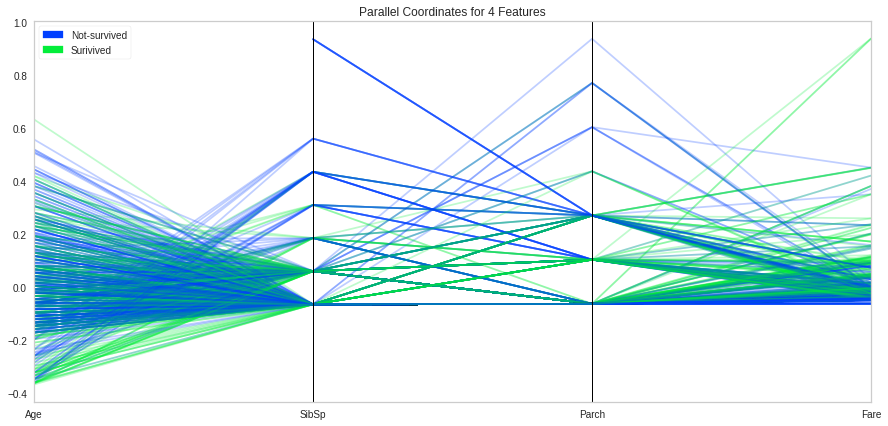

In [8]:
# ARE THE DISTRIBUTION OF NUMERICAL VARIABLES THE SAME OR DIFFERENT AMONG SURVIVED AND NOT SURVIVED?

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50
from yellowbrick.style import set_palette
set_palette('sns_bright')

from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Surivived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

titanic_norm= titanic.copy()
#Feature normalization
for feature in num_features:
    titanic_norm[feature]= ( titanic[feature] - titanic[feature].mean(skipna = True))/(titanic[feature].max(skipna = True) - titanic[feature].min(skipna = True))
# Extract the numpy arrays from the data frame
X= titanic_norm[num_features].to_numpy()
y = titanic["Survived"].to_numpy()
# Instantiate the visualizer                            
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

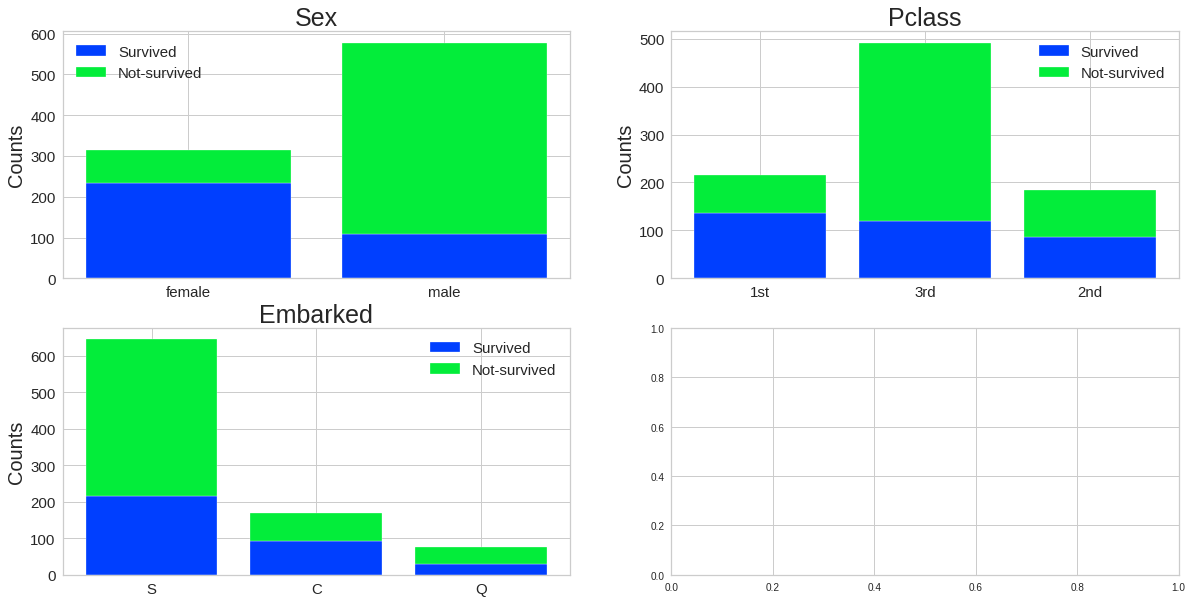

In [9]:
# ARE THERE DIFFERENT SURVIVAL RATES IN DIFFERENT CATEGORIES?

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

#value_counts() returns the count of unique entries i.e males & females in that column
Sex_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Sex'].value_counts()
Sex_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Sex'].value_counts()
# re-indexing the series obj 'Sex_not_survived'
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.array)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.array, bottom=Sex_survived.array)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

Pclass_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.array)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.array, bottom=Pclass_survived.array)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the titanic data read to feed into the visualizer
Embarked_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.array)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.array, bottom=Embarked_survived.array)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

In [10]:
# FEATURE SELECTION AND FEATURE ENGINEERING
# FILLING IN MISSING VALUES

# fill the missing age data with median value
def fill_na_median(full_data, inplace=True):
    return full_data.fillna(full_data.median(), inplace=inplace)

fill_na_median(full_data['Age'])
# check the result
full_data['Age'].describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [11]:
# FILLING IN MISSING VALUES

# fill missing 'Port of Embarkation' with its most represented value
def fill_na_most(full_data, inplace=True):
    return full_data.fillna('S', inplace=inplace)

fill_na_most(full_data['Embarked'])

# check the result
full_data['Embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

In [12]:
# LOG TRANSFORMATION OF THE FARE

def fill_na_mean(full_data, inplace=True):
    return full_data.fillna(full_data.mean(), inplace=inplace)

fill_na_mean(full_data['Fare'])
# check the result
full_data['Fare'].describe()

def log_transformation(data):
    return data.apply(np.log1p)

full_data['Fare_log1p'] = log_transformation(full_data['Fare'])
# print(titanic['Fare'].median())
full_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Fare_log1p
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000
mean,29.503186,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838,2.979835
std,12.905241,51.738879,0.865560,378.020061,0.837836,1.041658,0.486592,0.968420
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,2.185579
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,2.737881
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,3.474293
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,6.240917


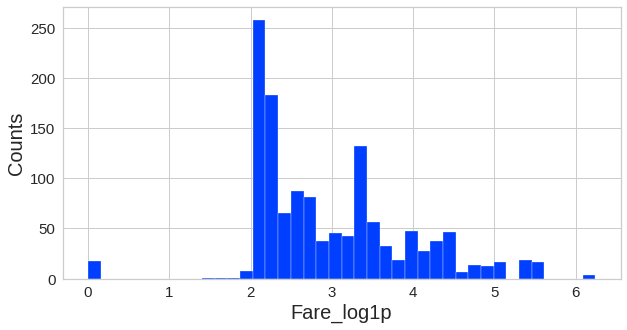

In [13]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(full_data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

In [14]:
# ONE HOT ENCODING FOR CATEGORICAL FEATURES

# get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
full_data_cat = full_data[cat_features]
full_data_cat = full_data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding; get_dummies: Convert categorical variable into dummy/indicator variables.
full_data_cat_dummies = pd.get_dummies(full_data_cat)

full_data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [15]:
# here we will combine the numerical features and the dummy features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']

X_full_data = pd.concat([full_data[features_model], full_data_cat_dummies], axis=1)
X_full_data.describe()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,0.498854,0.385027,2.979835,0.246753,0.211612,0.541635,0.355997,0.644003,0.206264,0.093965,0.699771
std,12.905241,1.041658,0.865560,0.968420,0.431287,0.408607,0.498454,0.478997,0.478997,0.404777,0.291891,0.458533
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,2.737881,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,3.474293,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,9.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data_model_X = X_full_data[ 0:891 ]
data_model_y = titanic.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

X_test = X_full_data[ 891: ]

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])
print("No. of samples in test set:", X_test.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  623
No. of samples in validation set: 268
No. of samples in test set: 418


No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


In [17]:
test_data = full_data[ 891: ]
test_data = test_data.reset_index(drop = True)
print(test_data.head())

    Age Cabin Embarked     Fare                                          Name  \
0  34.5   NaN        Q   7.8292                              Kelly, Mr. James   
1  47.0   NaN        S   7.0000              Wilkes, Mrs. James (Ellen Needs)   
2  62.0   NaN        Q   9.6875                     Myles, Mr. Thomas Francis   
3  27.0   NaN        S   8.6625                              Wirz, Mr. Albert   
4  22.0   NaN        S  12.2875  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

   Parch  PassengerId  Pclass     Sex  SibSp  Survived   Ticket  Fare_log1p  
0      0          892       3    male      0       NaN   330911    2.178064  
1      0          893       3  female      1       NaN   363272    2.079442  
2      0          894       2    male      0       NaN   240276    2.369075  
3      0          895       3    male      0       NaN   315154    2.268252  
4      1          896       3  female      1       NaN  3101298    2.586824  


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Your submission was successfully saved!


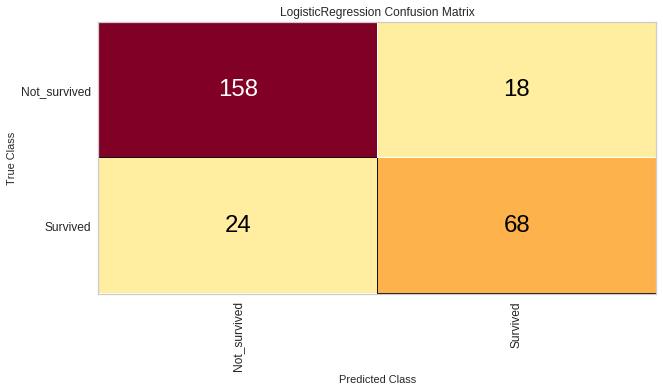

In [18]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
final_ans = np.where(predictions == 'Survived', 1, 0)

test_data = full_data[ 891: ]
test_data = test_data.reset_index(drop = True)   # removing old index of the dataframe full_data

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': final_ans })
output.to_csv('titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes = classes, fontsize= 12)
cm.fit(X_train,y_train)
cm.score(X_val, y_val)
# print(type(cm.classes))
for label in cm.ax.texts:
    label.set_size('24')
#How did we do?
cm.show()

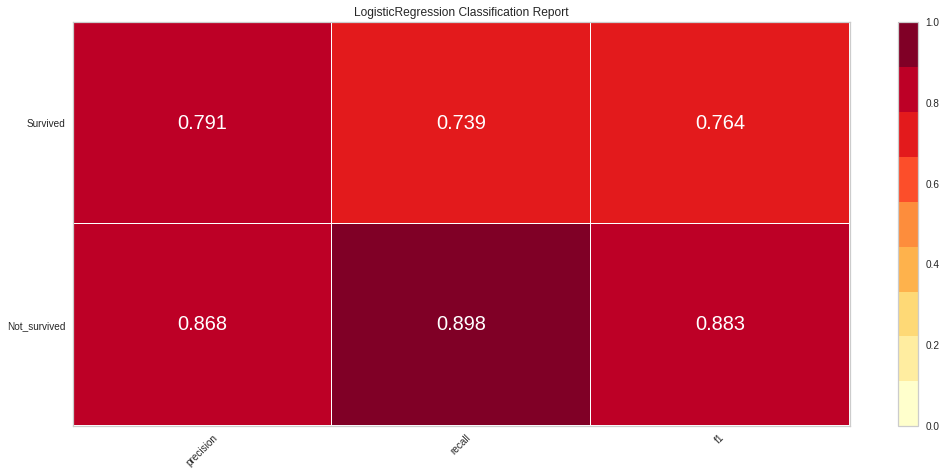

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.show()

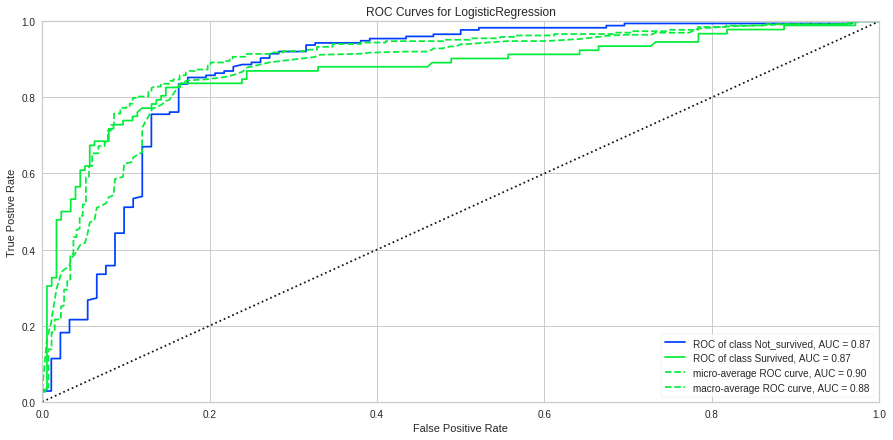

In [20]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.show()         # Draw/show/poof the data